In [1]:

from drn_interactions.interactions.loaders import SpontaneousActivityLoader, StateInteractionsLoader
from drn_interactions.interactions.preprocessors import InteractionsPreprocessor
from drn_interactions.interactions.pairwise import PairwiseCorr
from drn_interactions.interactions.graph_clustering import df_to_graph
from drn_interactions.config import Config, ExperimentInfo
import numpy as np
from drn_interactions.interactions.graph import GraphAttributes, NodeAttributes
import pandas as pd
import seaborn as sns
from drn_interactions.io import load_derived_generic

In [2]:
graph_attrs = GraphAttributes(inverse_distance=True)
node_attrs = NodeAttributes()
sessions = ExperimentInfo.eeg_sessions

graph_dfs = []
node_dfs = []
node_mappers = []
target = []


for state in ("sw", "act"):
    for session in sessions:
        loader = StateInteractionsLoader(state=state, session_name=session, block="pre", t_start=0, t_stop=1800)
        preprocessor = InteractionsPreprocessor()
        pairwise = PairwiseCorr(rectify=True)

        spikes = preprocessor(loader())
        df_affinity = pairwise.fit(spikes).get_adjacency_df().dropna(axis=1, thresh=5).dropna(axis=0, thresh=5)
        G = df_to_graph(df_affinity, rename_nodes=True)
        graph_stats = graph_attrs.get_graph_attributes(G).assign(session=session, state=state)
        node_stats = node_attrs.get_node_attributes(G, node_name="neuron_id").assign(session=session, state=state)

        graph_dfs.append(graph_stats)
        node_dfs.append(node_stats)

        node_mappers.append({node: neuron for node, neuron in enumerate(df_affinity.columns)})
        target.append(state)

<AxesSubplot:xlabel='state', ylabel='swp'>

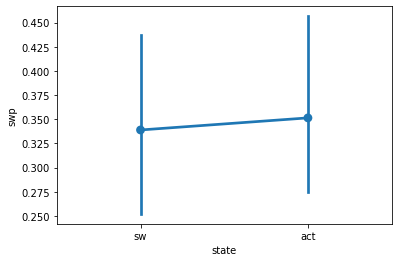

In [3]:

dfp = pd.concat(graph_dfs)
sns.pointplot(x="state", y="swp", data=dfp,)


<AxesSubplot:xlabel='state', ylabel='avg_clust'>

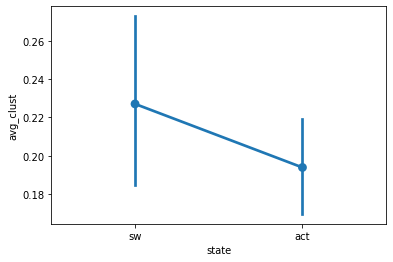

In [4]:
sns.pointplot(x="state", y="avg_clust", data=dfp,)

<AxesSubplot:xlabel='state', ylabel='degree'>

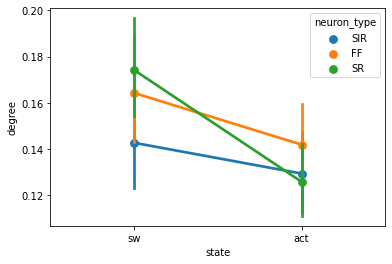

In [5]:
dfp = pd.concat(node_dfs).merge(load_derived_generic("neuron_types.csv"))

sns.pointplot(x="state", y="degree", data=dfp, hue="neuron_type")

<AxesSubplot:xlabel='state', ylabel='page_rank'>

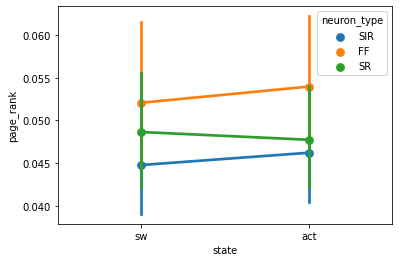

In [6]:
sns.pointplot(x="state", y="page_rank", data=dfp, hue="neuron_type")

<AxesSubplot:xlabel='state', ylabel='clust'>

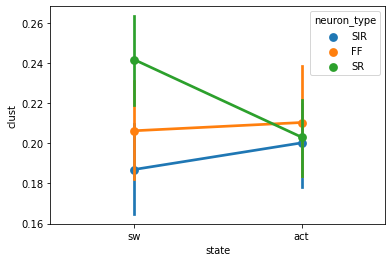

In [7]:
sns.pointplot(x="state", y="clust", data=dfp, hue="neuron_type")

In [47]:

from drn_interactions.interactions.loaders import BaseShockSlowInteractionsLoader

sessions = ExperimentInfo.foot_shock_sessions_10min
graphs = []

graph_dfs = []
node_dfs = []
node_mappers = []
target = []


for block in ("pre", "base_shock", "post_base_shock"):
    for session in sessions:
        preprocessor = InteractionsPreprocessor()
        pairwise = PairwiseCorr(rectify=True)
        loader = BaseShockSlowInteractionsLoader(block=block, session_name=session)

        spikes = preprocessor(loader())
        df_affinity = pairwise.fit(spikes).get_adjacency_df().dropna(axis=1, thresh=5).dropna(axis=0, thresh=5)
        
        G = df_to_graph(df_affinity, rename_nodes=True)
        graph_stats = graph_attrs.get_graph_attributes(G).assign(session=session, block=block)
        node_stats = node_attrs.get_node_attributes(G, node_name="neuron_id").assign(session=session, block=block)

        graph_dfs.append(graph_stats)
        node_dfs.append(node_stats)

        node_mappers.append({node: neuron for node, neuron in enumerate(df_affinity.columns)})
        target.append(state)

<AxesSubplot:xlabel='block', ylabel='swp'>

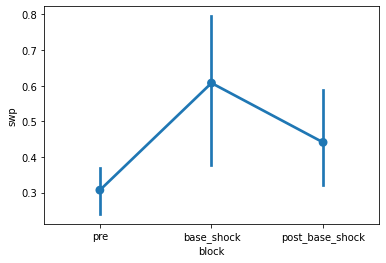

In [48]:

dfp = pd.concat(graph_dfs)
sns.pointplot(x="block", y="swp", data=dfp,)

<AxesSubplot:xlabel='block', ylabel='avg_clust'>

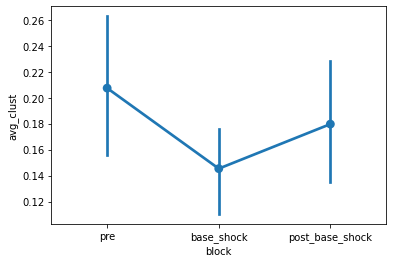

In [49]:

sns.pointplot(x="block", y="avg_clust", data=dfp,)

<AxesSubplot:xlabel='block', ylabel='degree'>

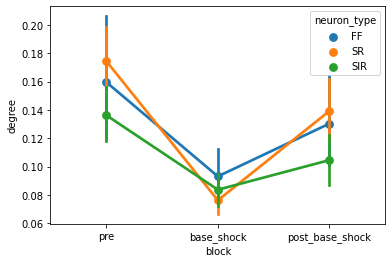

In [50]:

dfp = pd.concat(node_dfs).merge(load_derived_generic("neuron_types.csv"))

sns.pointplot(x="block", y="degree", data=dfp, hue="neuron_type")

<AxesSubplot:xlabel='block', ylabel='page_rank'>

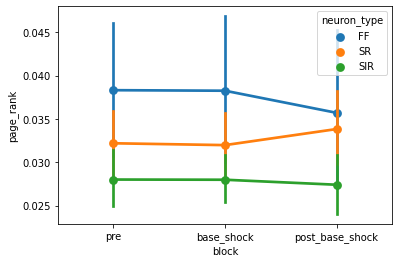

In [51]:

sns.pointplot(x="block", y="page_rank", data=dfp, hue="neuron_type")

<AxesSubplot:xlabel='block', ylabel='clust'>

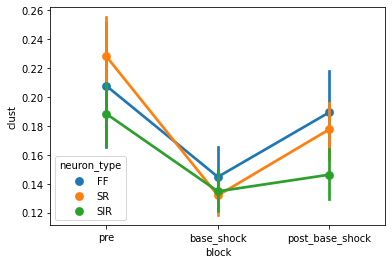

In [52]:

sns.pointplot(x="block", y="clust", data=dfp, hue="neuron_type")